## Importing required libraries

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.optimizers as Optimizers
import tensorflow.keras.activations as Activations
import tensorflow.keras.utils as Utils

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from sklearn.model_selection import train_test_split
from random import randint

## Creating a function for reading images

#### We will use a manual function to read images an specify and integer value to each fish type.

In [2]:
def get_images(directory):
    Images = []
    Labels = []
    label_id = 0
    
    for label in os.listdir(directory):
        if label == 'Black Sea Sprat':
            label_id = 0
        elif label == 'Gilt-Head Bream':
            label_id = 1
        elif label == 'Hourse Mackerel':
            label_id = 2
        elif label == 'Red Mullet':
            label_id = 3
        elif label == 'Red Sea Bream':
            label_id = 4
        elif label == 'Sea Bass':
            label_id = 5
        elif label == 'Shrimp':
            label_id = 6
        elif label == 'Striped Red Mullet':
            label_id = 7
        elif label == 'Trout':
            label_id = 8
        else:
            label_id = -1
            
        if label_id!=-1:
            for image_file in os.listdir(directory + label + '/' + label):
                image = cv2.imread(directory + label + '/' + label + '/' + image_file)
                image = cv2.resize(image, (256, 256))
    #             print(image_file)
                Images.append(image)
                Labels.append(label_id)
            
    return shuffle(Images, Labels, random_state = 246810)
            
def get_classlabel(class_code):
    labels = {0 : 'Black Sea Sprat',
              1 : 'Gilt-Head Bream',
              2 : 'Hourse Mackerel',
              3 : 'Red Mullet',
              4 : 'Red Sea Bream',
              5 : 'Sea Bass',
              6 : 'Shrimp',
              7 : 'Striped Red Mullet',
              8 : 'Trout'
             }
    
    return labels[class_code]

In [4]:
Images, Labels = get_images('./Fish_Dataset/Fish_Dataset/')

In [5]:
Images = np.array(Images)
Labels = np.array(Labels)

In [6]:
Images.shape

(9000, 256, 256, 3)

## Let's view a few of these images with their respective classes

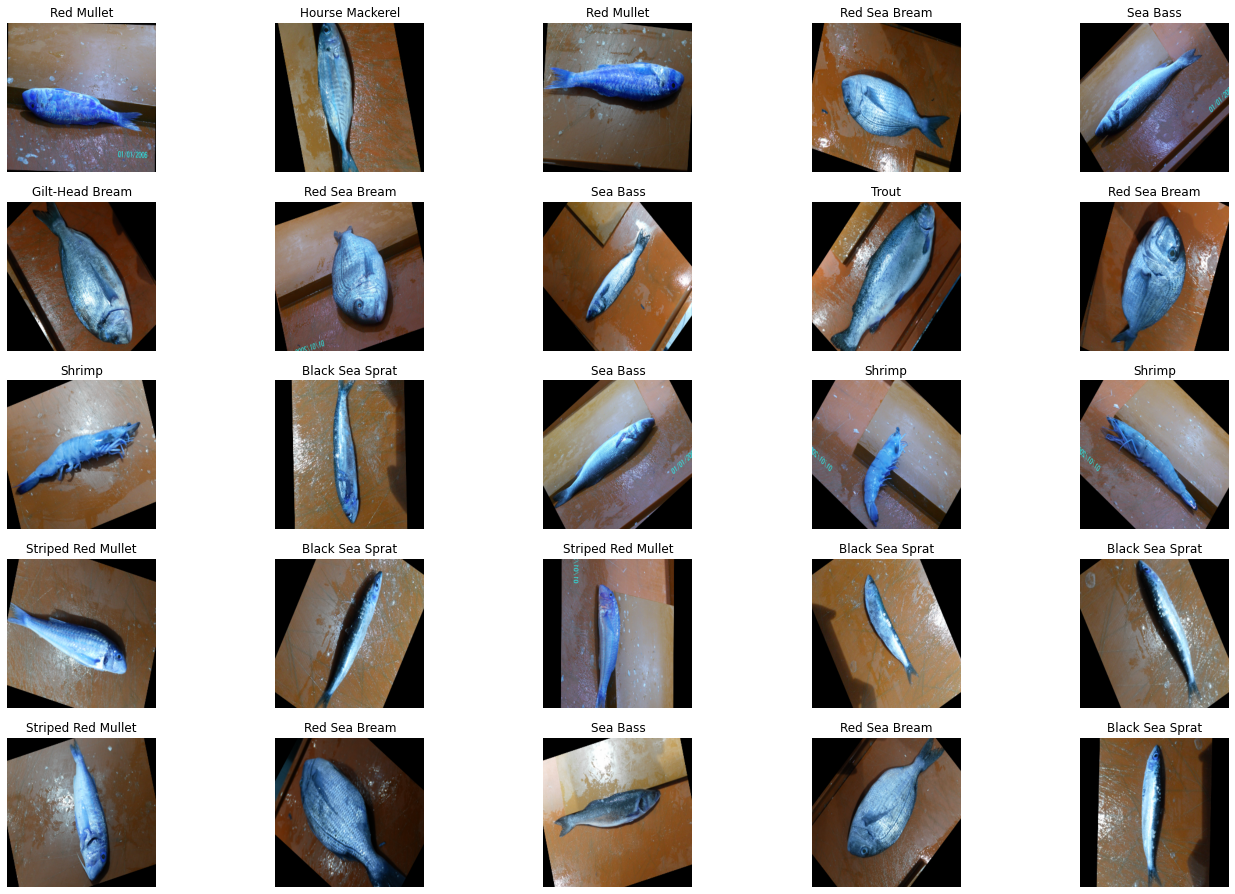

In [7]:
f, ax = plot.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

### Splitting the data into train and test

In [8]:
Images_train, Images_test, Labels_train, Labels_test = train_test_split(Images, Labels, random_state = 246810, test_size=0.15)

#### We can not free up the memory by deleting Images and Labels

In [9]:
del Images
del Labels

## Model definition

In [10]:
model = Models.Sequential()
model.add(Layers.Conv2D(32, 3, activation = 'relu', input_shape = (256, 256, 3)))
model.add(Layers.Conv2D(64, 3, activation = 'relu'))
model.add(Layers.MaxPool2D(3, 3))
model.add(Layers.Conv2D(64, 3, activation = 'relu'))
model.add(Layers.Conv2D(128, 3, activation = 'relu'))
model.add(Layers.MaxPool2D(3, 3))
model.add(Layers.Flatten())
model.add(Layers.Dense(120, activation='relu'))
model.add(Layers.Dense(45, activation='relu'))
model.add(Layers.Dropout(0.5))
model.add(Layers.Dense(9, activation='sigmoid'))
model.compile(metrics = ['accuracy'], optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

#### Training with 20% validation data

In [11]:
trained_model = model.fit(Images_train, Labels_train, validation_split = 0.20, epochs=35)

Epoch 1/35
192/192 [==============================] - 19s 81ms/step - loss: 20.3365 - accuracy: 0.2215 - val_loss: 1.2985 - val_accuracy: 0.5752
Epoch 2/35
192/192 [==============================] - 14s 75ms/step - loss: 1.3636 - accuracy: 0.5030 - val_loss: 0.5139 - val_accuracy: 0.8294
Epoch 3/35
192/192 [==============================] - 14s 76ms/step - loss: 0.6915 - accuracy: 0.7477 - val_loss: 0.2083 - val_accuracy: 0.9438
Epoch 4/35
192/192 [==============================] - 14s 75ms/step - loss: 0.3446 - accuracy: 0.8825 - val_loss: 0.0810 - val_accuracy: 0.9797
Epoch 5/35
192/192 [==============================] - 15s 76ms/step - loss: 0.2296 - accuracy: 0.9242 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 6/35
192/192 [==============================] - 14s 75ms/step - loss: 0.1621 - accuracy: 0.9443 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 7/35
192/192 [==============================] - 15s 76ms/step - loss: 0.1315 - accuracy: 0.9598 - val_loss: 0.0454 - val_accuracy

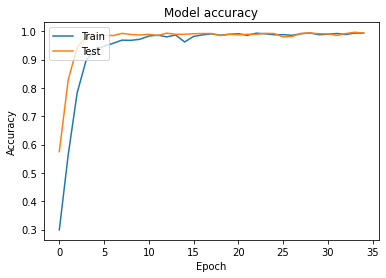

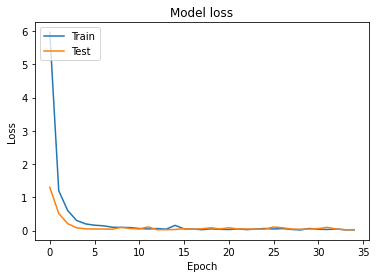

In [12]:
plot.plot(trained_model.history['accuracy'])
plot.plot(trained_model.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained_model.history['loss'])
plot.plot(trained_model.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

## Time to predict

In [17]:
Labels_prediction = model.predict(Images_test)

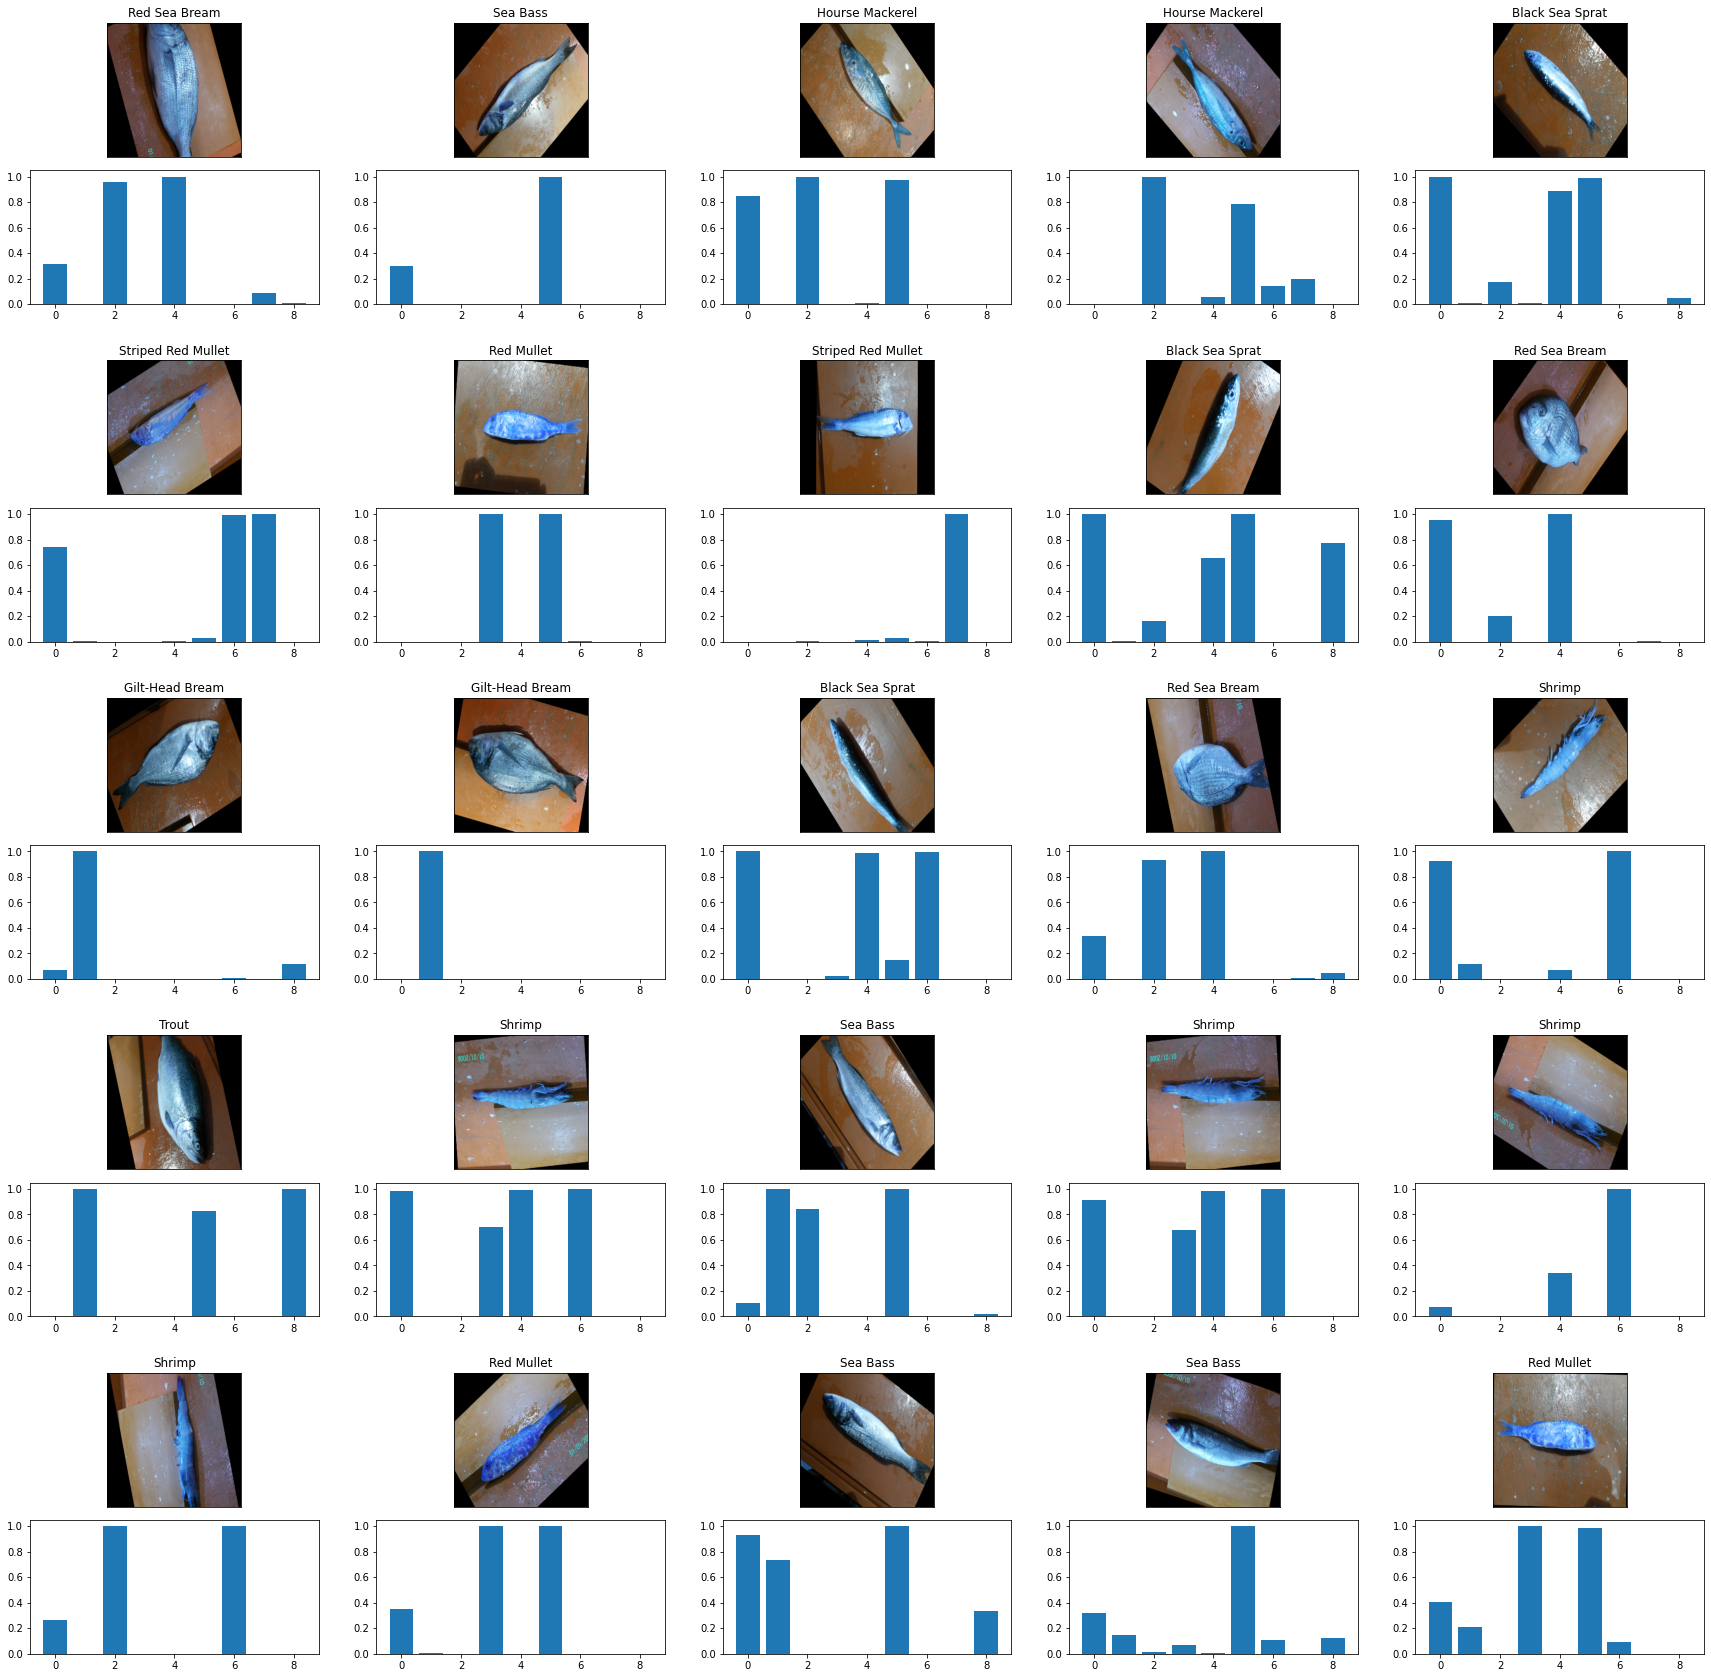

In [22]:
import matplotlib.gridspec as gridspec

fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(Images_test))
    pred_image = np.array([Images_test[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(9)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6,7,8],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Labels_test, np.argmax(Labels_prediction, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       0.94      0.98      0.96       145
           2       1.00      1.00      1.00       123
           3       0.98      1.00      0.99       139
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00       145
           6       1.00      0.99      1.00       154
           7       1.00      1.00      1.00       150
           8       0.99      0.94      0.97       163

    accuracy                           0.99      1350
   macro avg       0.99      0.99      0.99      1350
weighted avg       0.99      0.99      0.99      1350



## End